In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

import plot

path = '/Users/katherinegarcia/Desktop/Vision/imgs/'

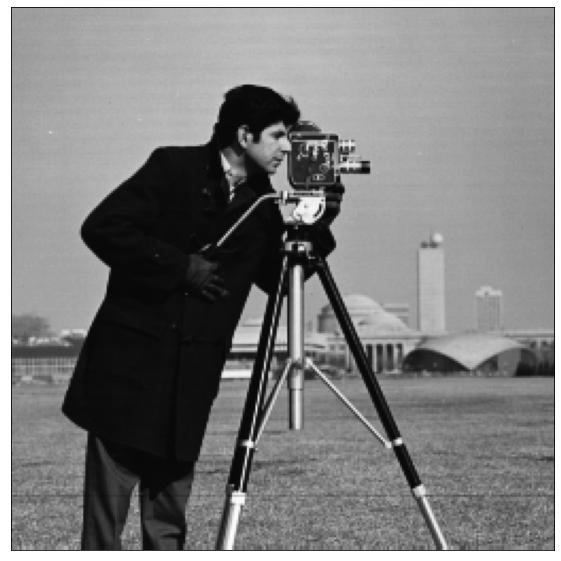

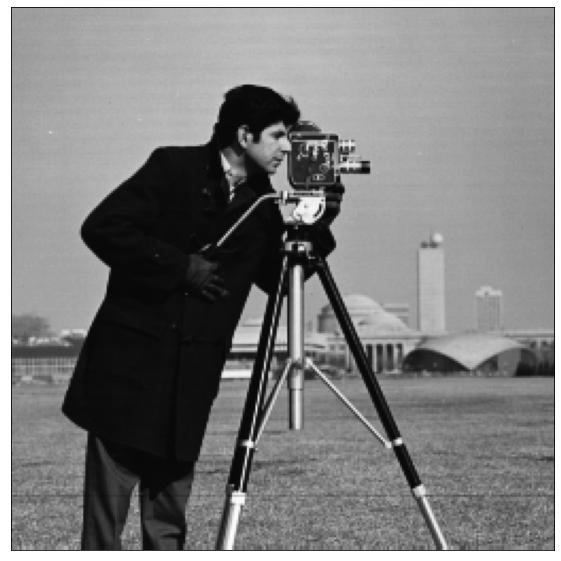

In [2]:
# img bw
im = cv.imread(os.path.join(path,'cameraman.tif'), cv.IMREAD_GRAYSCALE)
plot.imgView(im)

In [3]:
avg_k = np.array([[1/9,1/9,1/9],
                  [1/9,1/9,1/9],
                  [1/9,1/9,1/9]])

In [8]:
def imgFilter(img, kernel):
    rImg,cImg = img.shape
    rK,cK = kernel.shape
    assert(rK == cK)
    R = rK//2
    filtered = np.zeros((rImg,cImg), dtype=np.float64)
    for i in range(R, rImg-R):# i filas j columnas
        for j in range(R, cImg-R):
            w = img[i-R:i+R+1,j-R:j+R+1]
            mult = 0
            for iK in range(0, rK):# i filas j columnas
                for jK in range(0, cK):
                    mult += w[iK,jK] * kernel[iK,jK]
            filtered[i,j] = mult
    return filtered

In [5]:
filteredImg = imgFilter(im,avg_k)
filteredImg = filteredImg.astype(np.uint8)

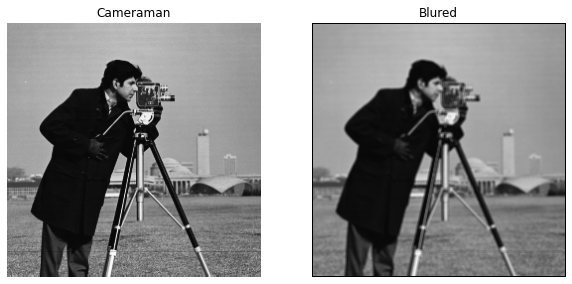

In [10]:
plot.imgComp(im,filteredImg, title=["Cameraman", "Blured"])

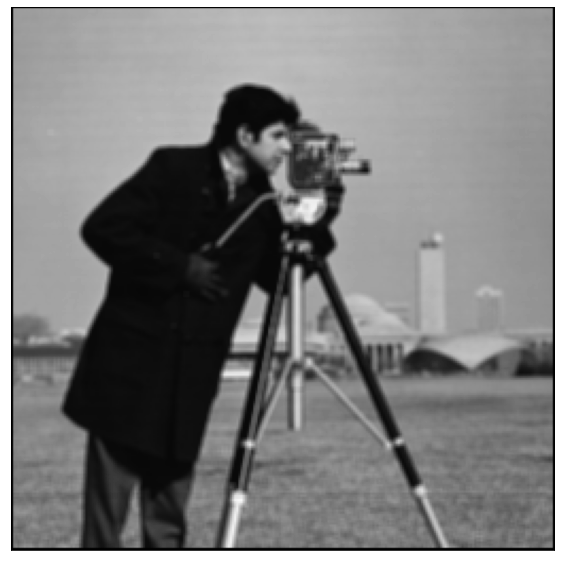

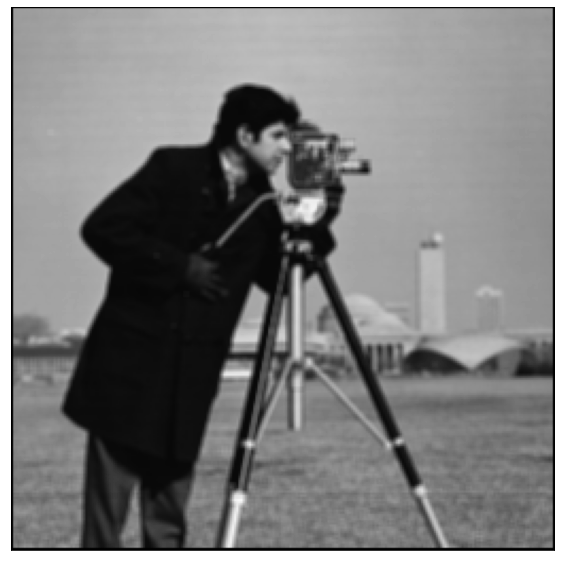

In [7]:
plot.imgView(filteredImg)

In [ ]:
def imgCmp(img1, img2, titles=None, filename=None):
    """Image comparison
    Args:
        img1: image 1
        img2: image 2
        titles: list of titles for the imgs
        filename: name to save img
    """
    if len(titles) == 2:
        t1 = titles[0]
        t2 = titles[1]
    elif len(titles) == 1:
        t1,t2 = titles[0],titles[0]
    else: 
        t1,t2 = None,None

    fig = plt.figure(figsize=(10,5))

    ax1 = fig.add_subplot(121)
    im1 = plot.imgView(img1, title=t1)
    print(type(im1))
    ax1.imshow(im1)

    # # ax2 = fig.add_subplot(122)
    # # im2 = plot.imgView(img2, title=t2)
    # # print(type(im2))
    # # ax1.imshow(im2)

    # if filename:
    #     plt.savefig(filename,bbox_inches='tight',pad_inches=0, format='png')
    # else:
    #     plt.show()


In [ ]:
imgCmp(im, filteredImg, ["HEllo"], "try")

In [ ]:
plot.imgComp(im, filteredImg, ["HEllo"], "try")

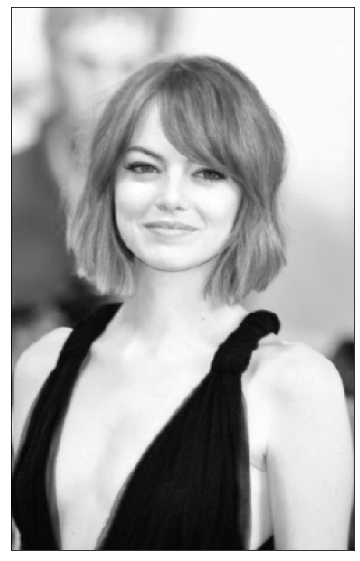

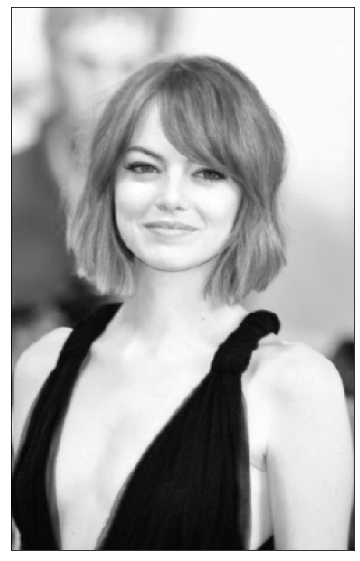

In [2]:
imA = cv.imread(os.path.join(path,'act.png'), cv.IMREAD_GRAYSCALE)
plot.imgView(imA)

In [3]:
def imgSobel(img):
    kernelX = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    kernelY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    gx = plot.imgFilter(img,kernelX)
    gy = plot.imgFilter(img,kernelY)

    magnGrad = np.sqrt(((gx**2)+(gy**2)))
    dirGrad = np.arctan(gy,gx)
    return magnGrad, dirGrad

In [4]:
magn, dirr = imgSobel(imA)

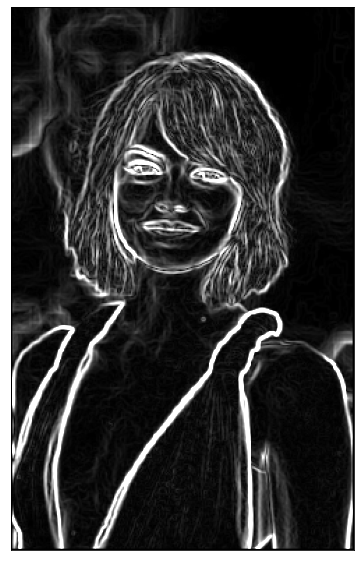

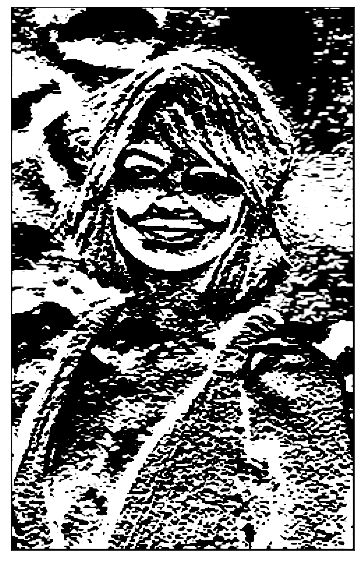

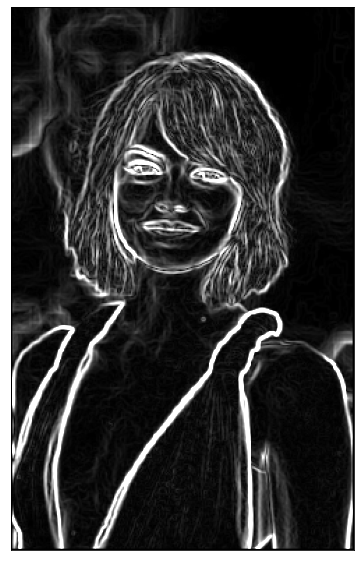

In [7]:
plot.imgView(dirr*255)
plot.imgView(magn)

In [ ]:
cv.Sobel(im,ddepth=cv.CV_32F,dx=1, dy=0)